# Customer Segmentation using K-Means clustering


# I. Module imports, data input and cleaning

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import numpy as np
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df.head(3)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# '''Calculate percentage null values for each column or feature'''
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [7]:
'''Drop rows with any null values'''

df1 = df.dropna(subset = ["CustomerID","Age"])
df1.shape

(200, 5)

In [8]:
'''Drop duplicated rows'''

df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [63]:
'''We need only few columns from given dataset'''

df3 = df2 [['CustomerID','Age']]
print(df3.shape)
df3.head(2)

(200, 2)


,CustomerID,Age
0,1,19
1,2,21


# II. Data Pre-processing

In [29]:
'''The K-means clustering algorithm has a few key assumptions about the data: (1) data is not skewed, 
(2) features have the same mean and, (3) features have the same variance'''

df3.describe()

,CustomerID,Age
count,200.000000,200.000000
mean,100.500000,38.850000
std,57.879185,13.969007
min,1.000000,18.000000
25%,50.750000,28.750000
50%,100.500000,36.000000
75%,150.250000,49.000000
max,200.000000,70.000000


In [30]:
df3.head()

,CustomerID,Genre,Age
0,1,Male,19
1,2,Male,21
2,3,Female,20
3,4,Female,23
4,5,Female,31


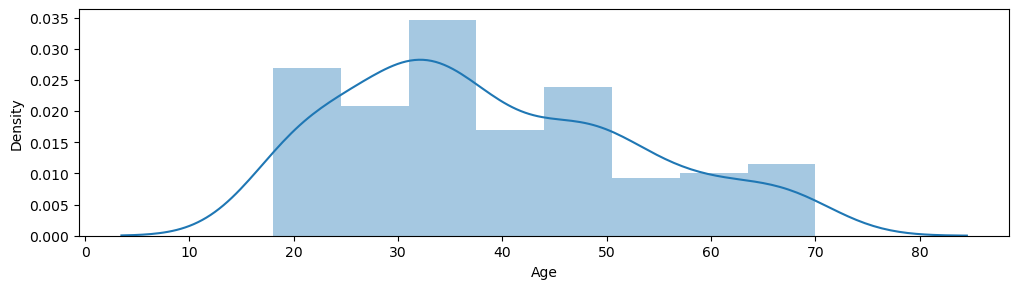

In [40]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df3['Age'])

# Show the plot
plt.show()

# III. K-means clustering

# K-means clustering using python library

In [41]:
k_means = KMeans(n_clusters=2, random_state=1)

In [65]:
k_means.fit(df3)
clus_labels = k_means.labels_

In [66]:
df5_clus2 = df3.assign(Cluster = clus_labels)
print(df5_clus2.shape)
df5_clus2.head(2)


(200, 3)


,CustomerID,Age,Cluster
0,1,19,0
1,2,21,0


In [68]:
df5_clus2.groupby(['Cluster']).agg({'Age': 'mean'}).round(0)

,Age
Cluster,
0,39.0


In [70]:
'''1. Elbow method'''

# Fit KMeans and calculate SSE for each *k*
ss_error = {}
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(df3)
    ss_error[k] = k_means.inertia_

<AxesSubplot:title={'center':'Elbow plot'}, xlabel='Value of k', ylabel='Sum of squared error'>

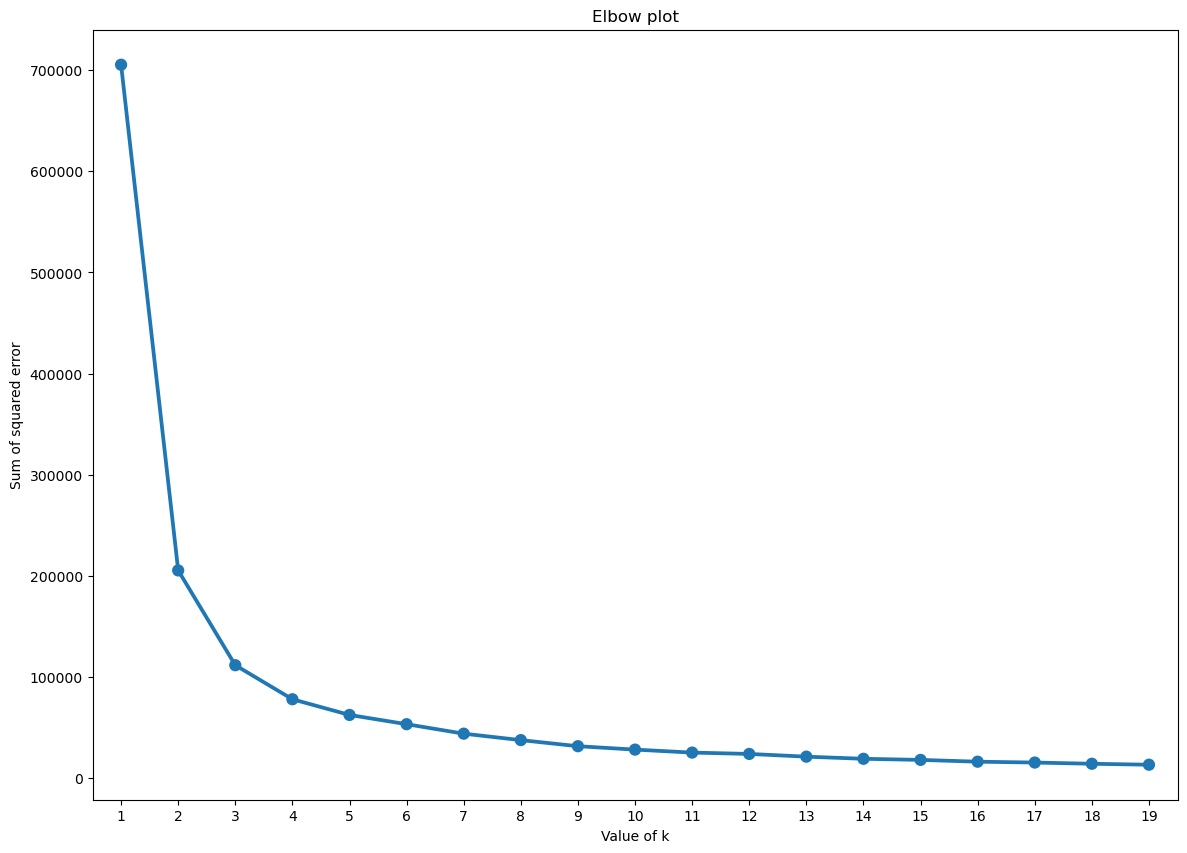

In [71]:
# Make elbow plot
plt.figure(figsize = (14,10))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

For n_clusters = 2 The average silhouette_score is : 0.5717852368545379
For n_clusters = 3 The average silhouette_score is : 0.4979765800773034
For n_clusters = 4 The average silhouette_score is : 0.4441474813180802
For n_clusters = 5 The average silhouette_score is : 0.4044875212656004
For n_clusters = 6 The average silhouette_score is : 0.4207196981781678
For n_clusters = 7 The average silhouette_score is : 0.39584550553529385
For n_clusters = 8 The average silhouette_score is : 0.43394918275441335
For n_clusters = 10 The average silhouette_score is : 0.40113681183486916
For n_clusters = 12 The average silhouette_score is : 0.4127092137182029
For n_clusters = 14 The average silhouette_score is : 0.40928895431921947


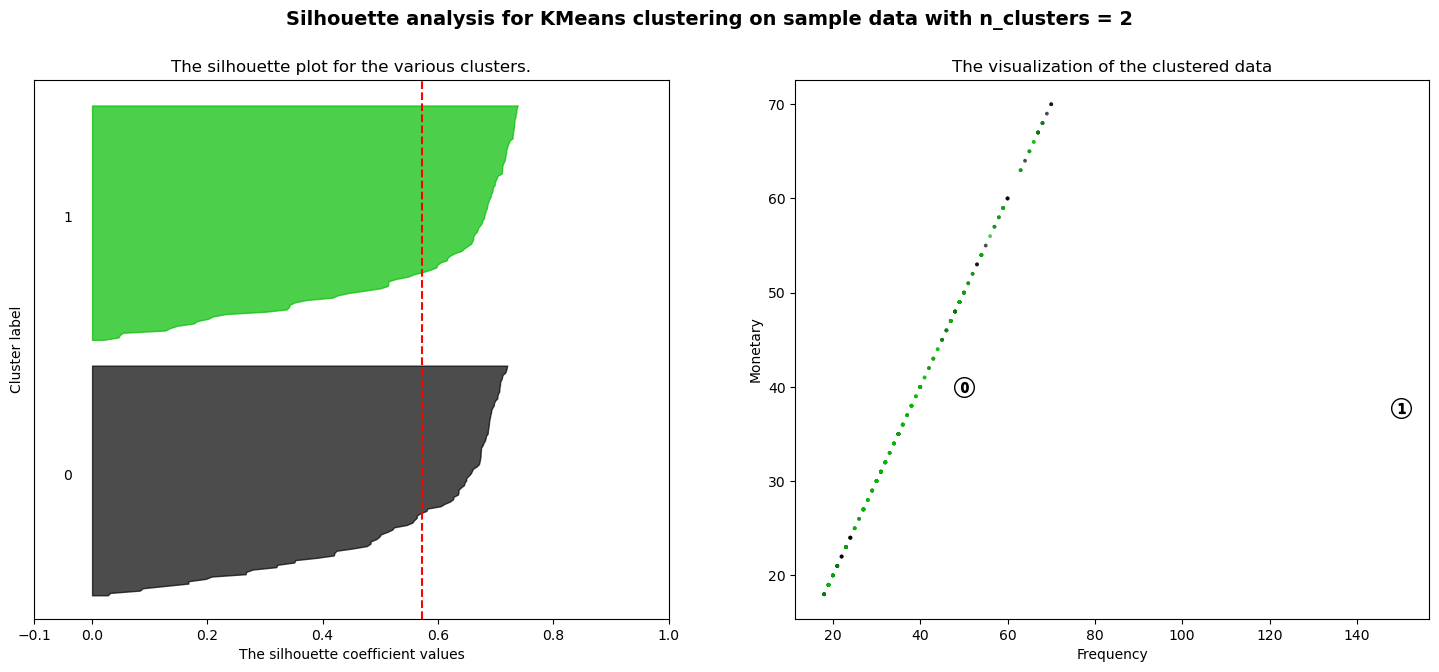

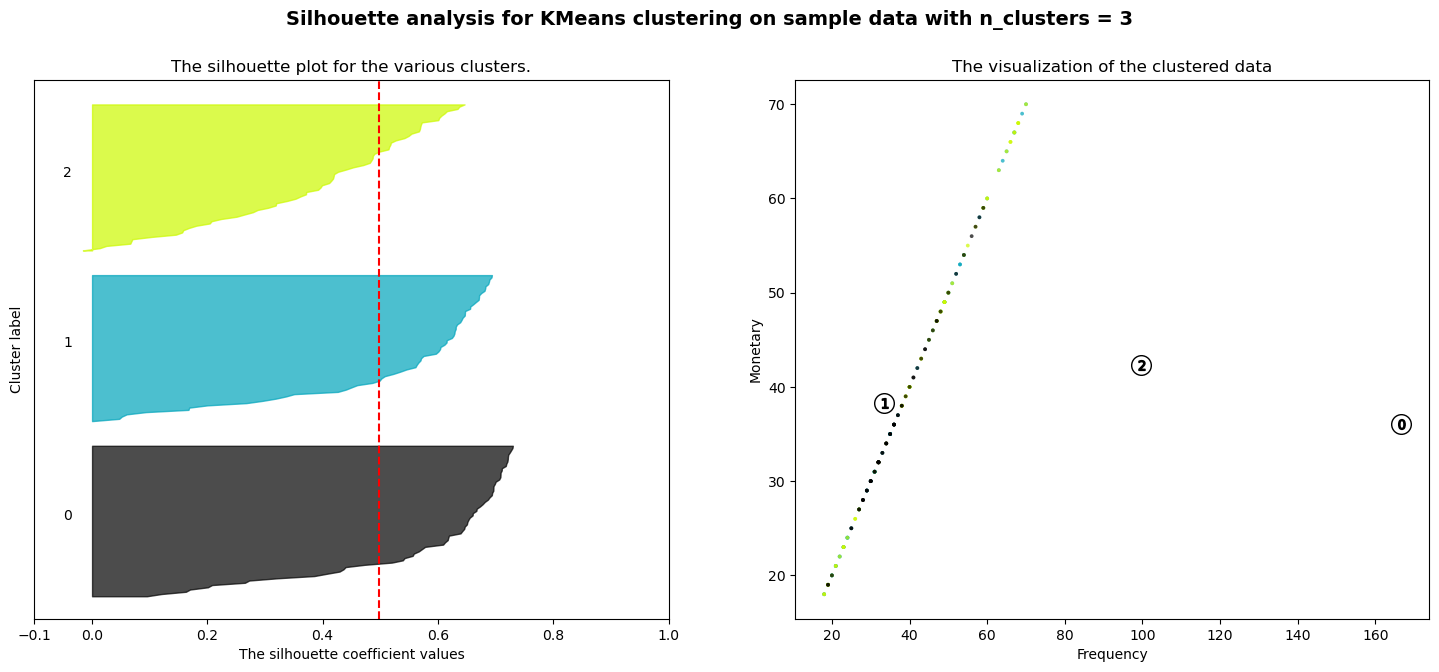

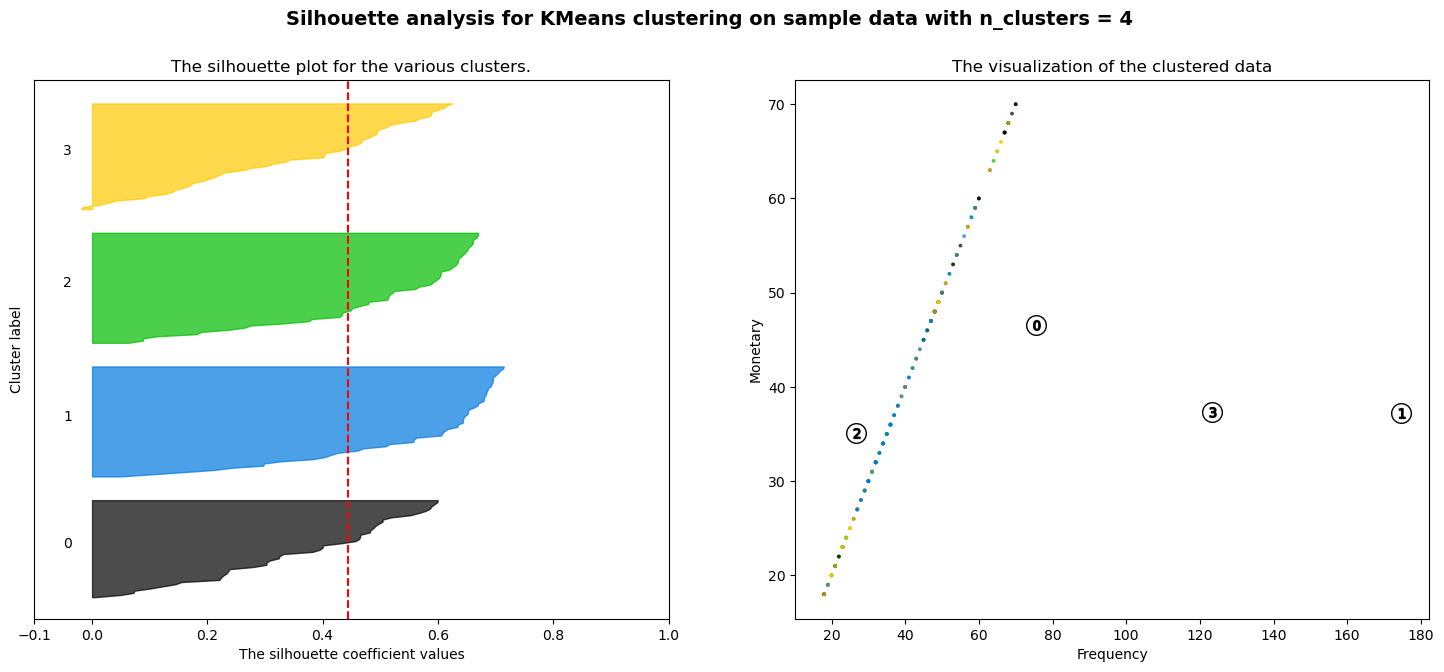

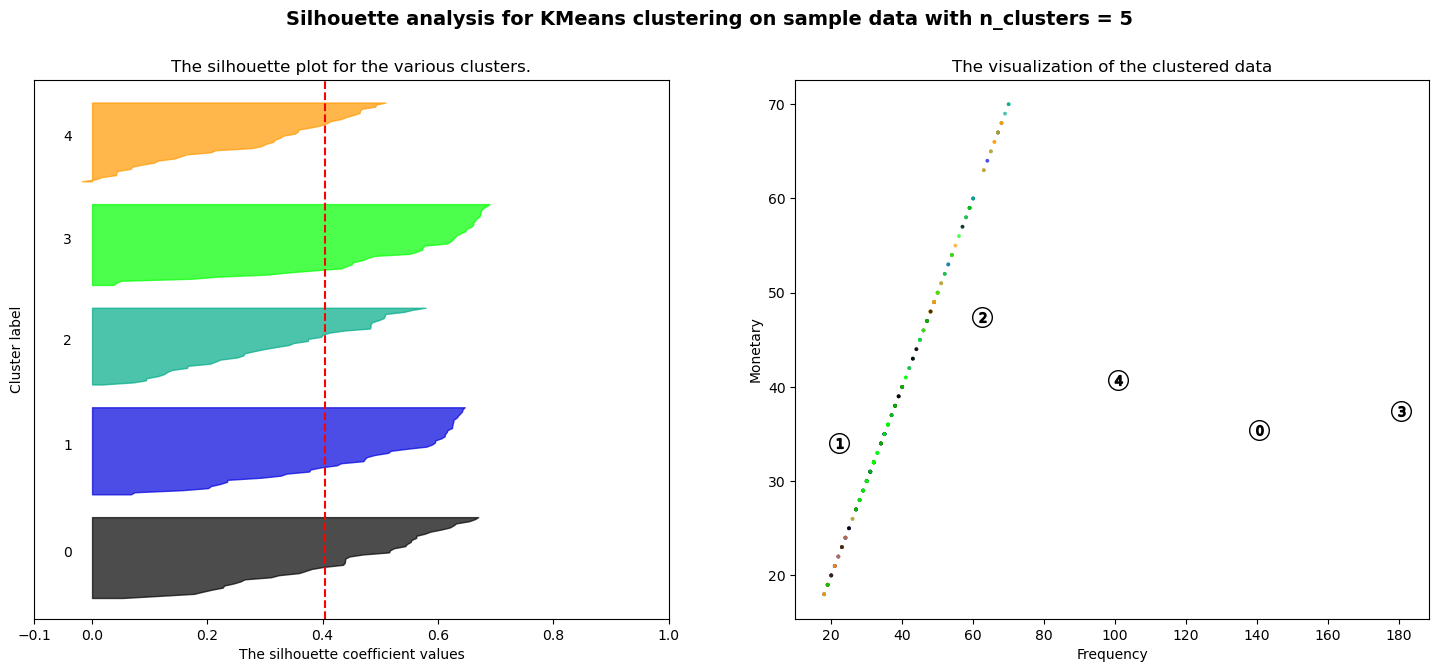

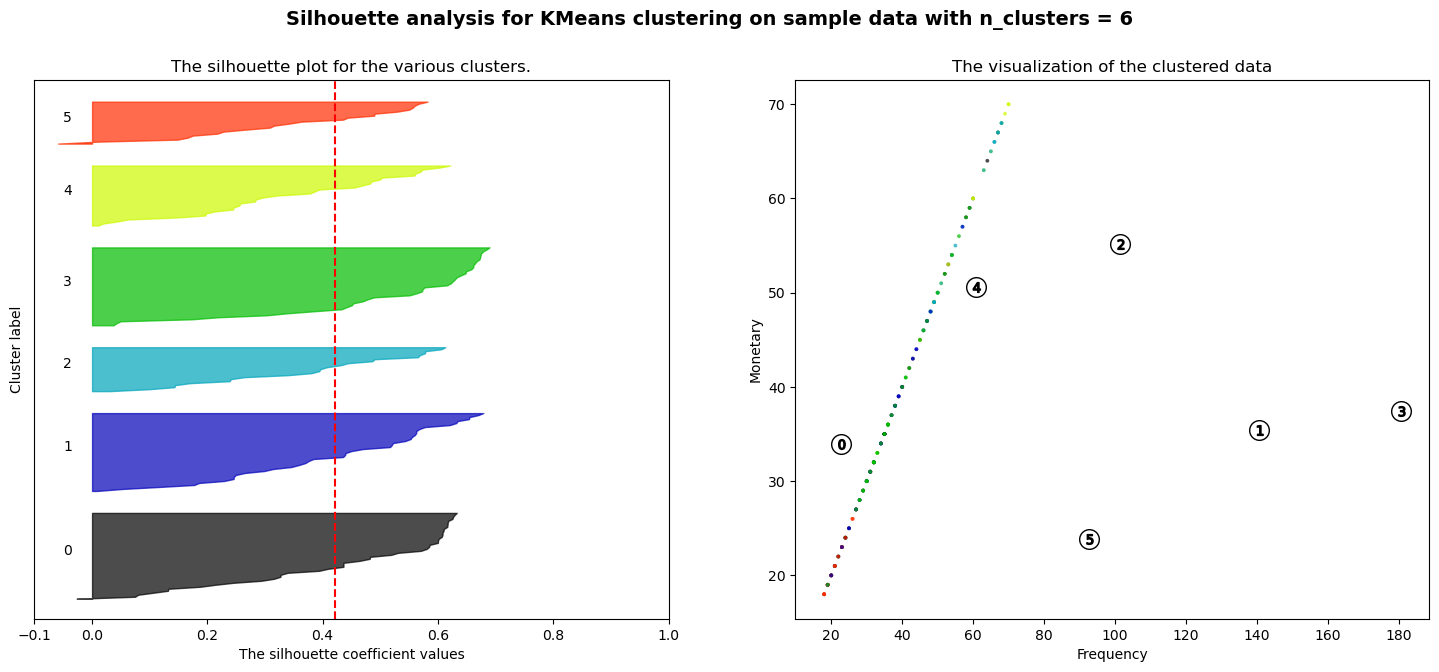

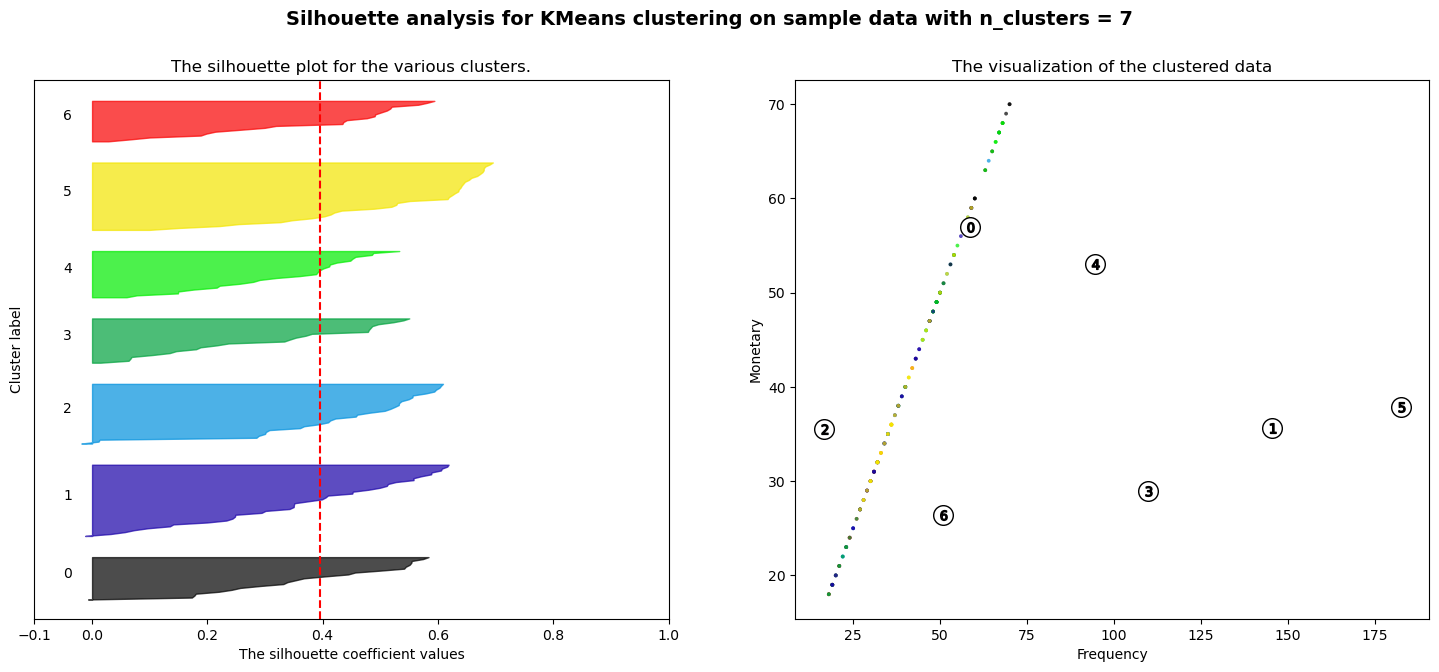

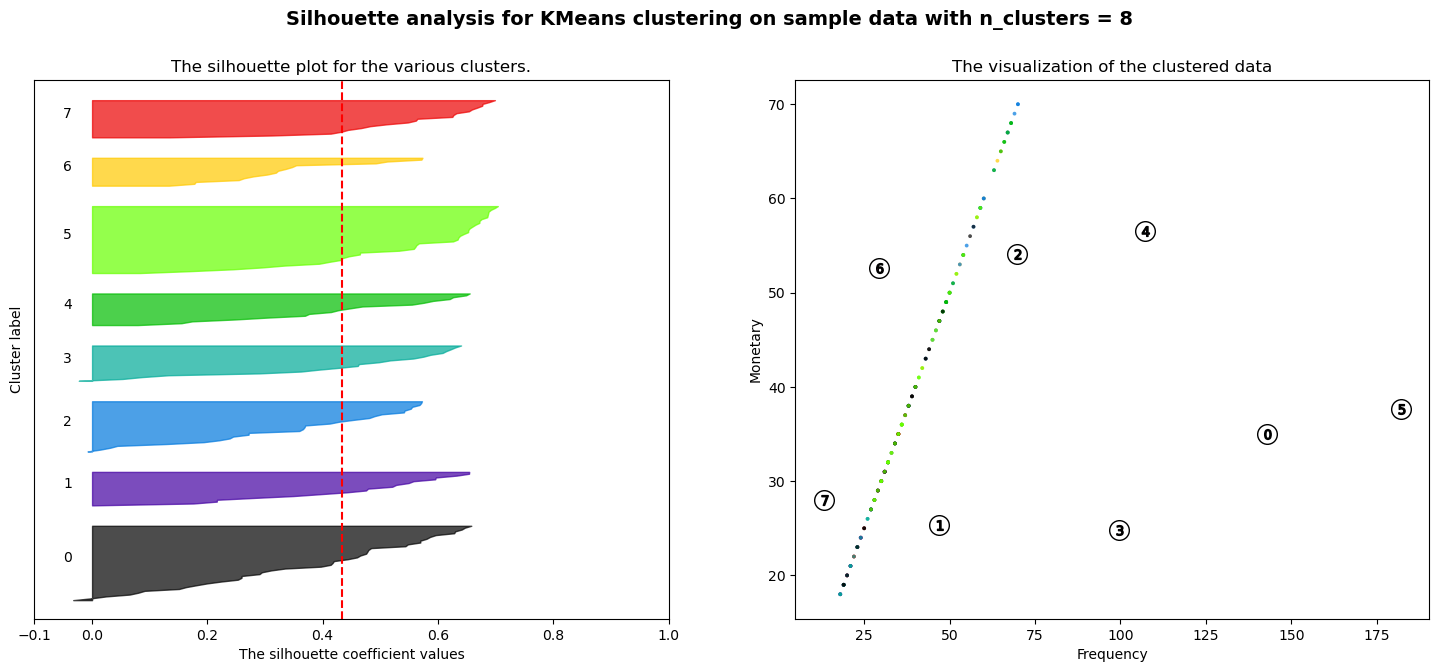

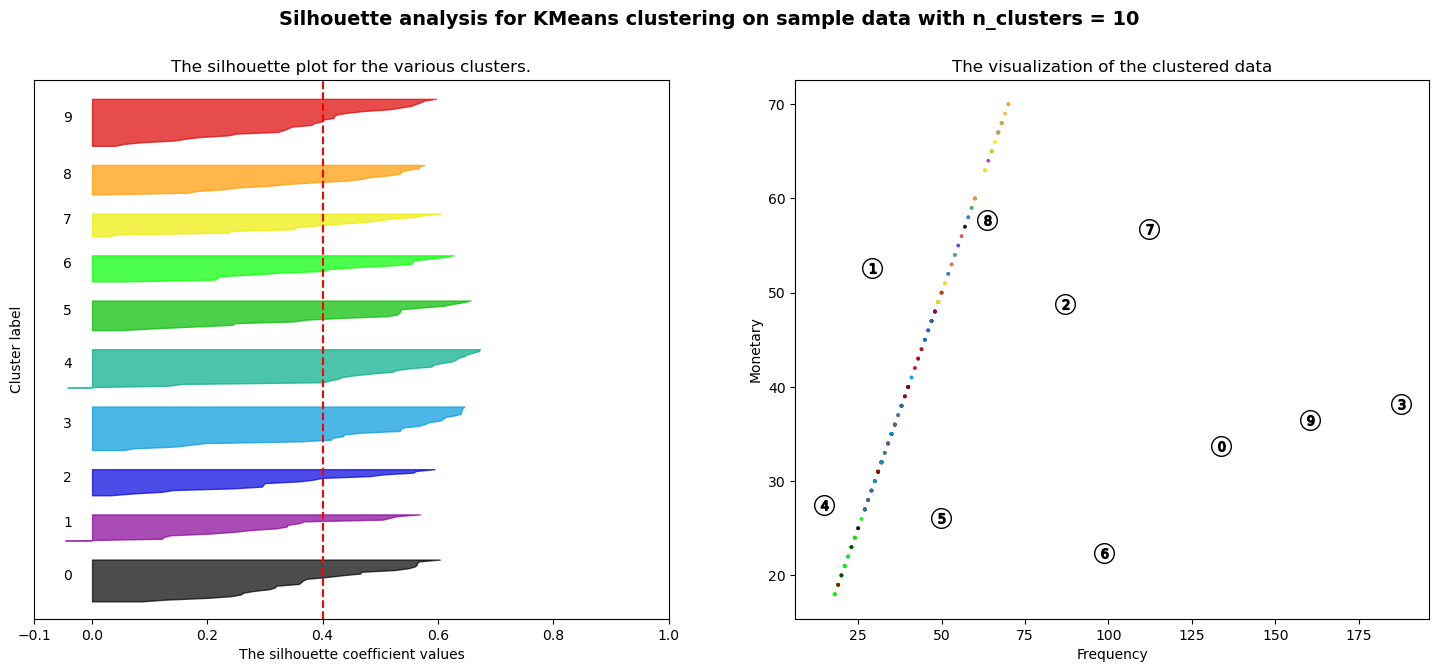

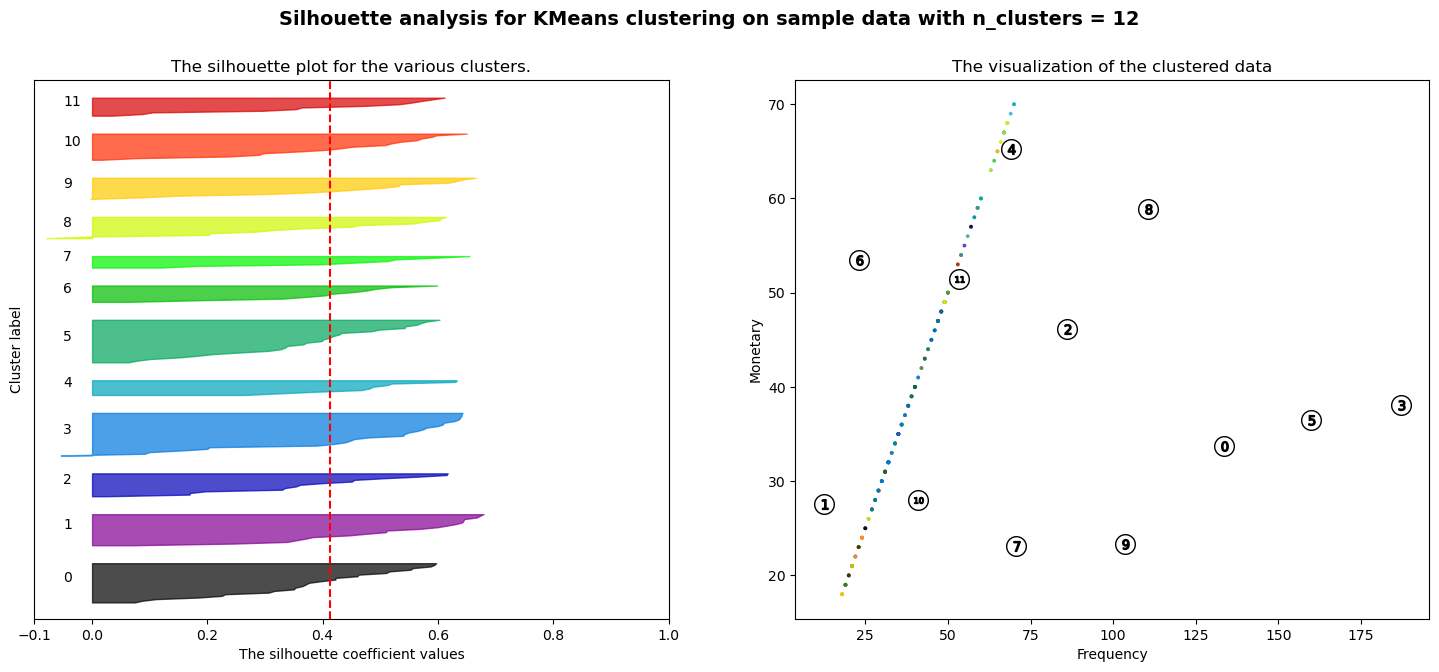

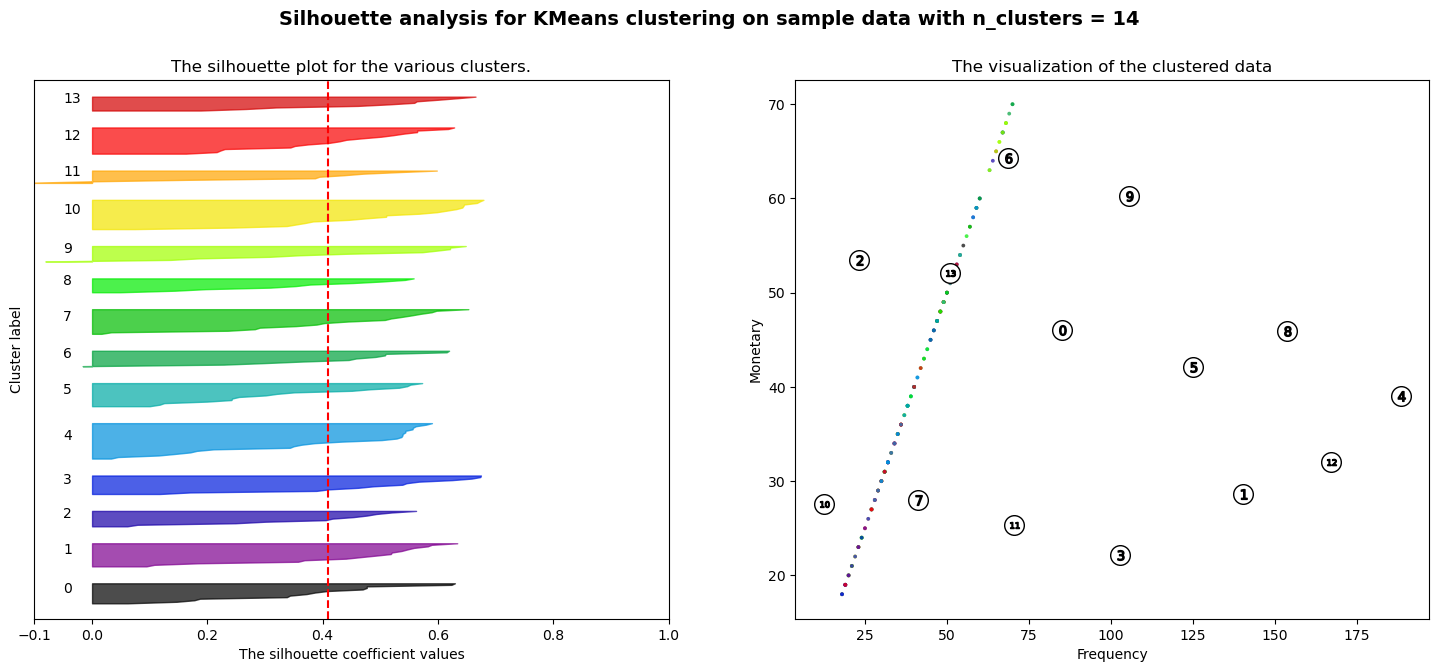

In [98]:
'''2. Solhouttte method.
Looks like k = 2 is a good solution. But always, explore other values of K around the elbow.
Finally disucss several solutions with stakeholders to see which makes most sense !
Here, we also use Silhoutte plots and scores'''

# Number of clusters confirmation by silhoutte scores
X = df3
range_n_clusters = [2, 3, 4, 5, 6,7,8,10,12,14]
for n_clusters in range_n_clusters:
    global str
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, i)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X["Age"], X["Age"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Frequency")
    ax2.set_ylabel("Monetary")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

In [83]:
df8 = df3.assign(Cluster = clus_labels)
print(df8.shape)
df8.head(3)

(200, 3)


,CustomerID,Age,Cluster
0,1,19,0
1,2,21,0
2,3,20,0


In [85]:
'''Use melt to transform the dataframe (not the data itself)'''
df8_melt = pd.melt(df8.reset_index(), id_vars=['Cluster'],
value_vars=['Age'], var_name='Attribute',
value_name='Value')

In [86]:
df8_melt.head(3)

,Cluster,Attribute,Value
0,0,Age,19
1,0,Age,21
2,0,Age,20


<AxesSubplot:title={'center':'Segment plot'}, xlabel='Attribute', ylabel='Value'>

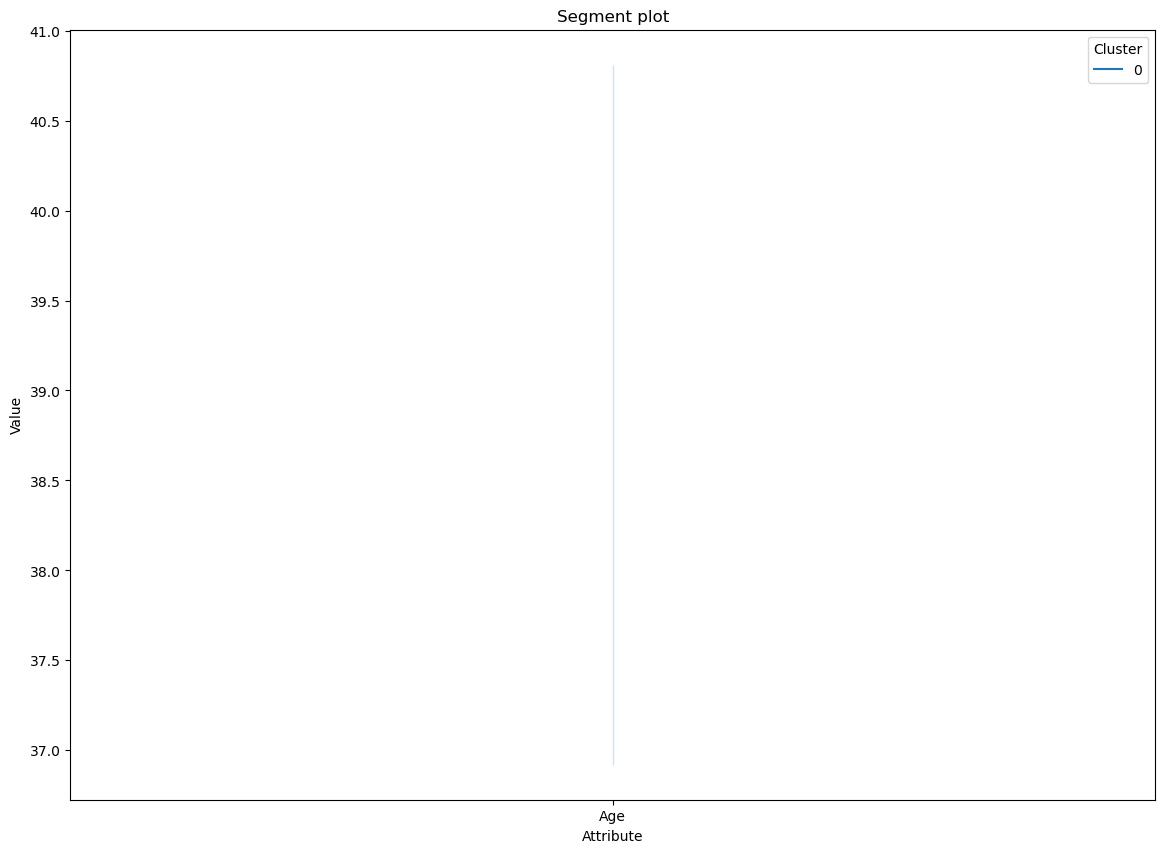

In [87]:
'''Visualize segment characteristics to understand the clusters better'''
plt.figure(figsize = (14,10))
plt.title('Segment plot') 
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=df8_melt)

# IV. Relative feature importances w.r.t clusters

In [88]:
cluster_avg = df5_clus2.groupby(['Cluster']).mean()
cluster_avg

,CustomerID,Age
Cluster,,
0,100.5,38.85


In [90]:
population_avg = df3.mean()
population_avg

CustomerID    100.50
Age            38.85
dtype: float64

In [96]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,CustomerID,Age
Cluster,,
0,0.0,0.0


<AxesSubplot:title={'center':'Relative importance of attributes'}, ylabel='Cluster'>

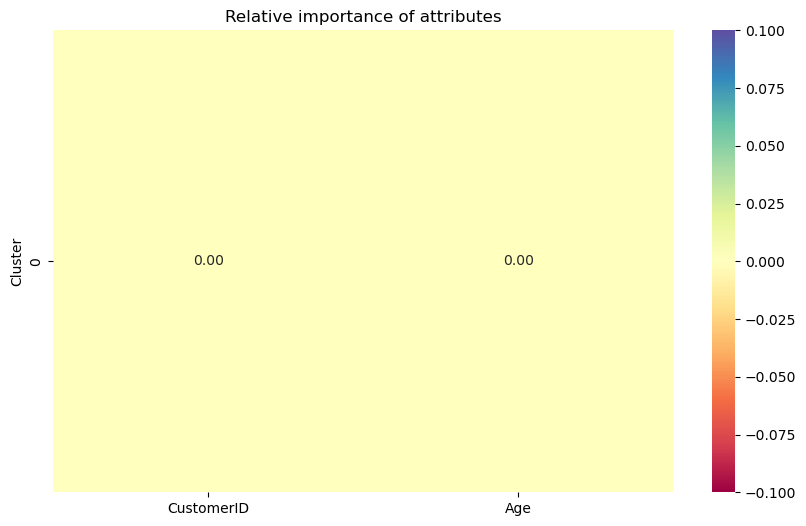

In [97]:
plt.figure(figsize=(10, 6))
plt.title('Relative importance of attributes') 
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Spectral')